In [1]:
# Load the Libraries

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import make_blobs

2023-06-05 17:35:38.997661: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


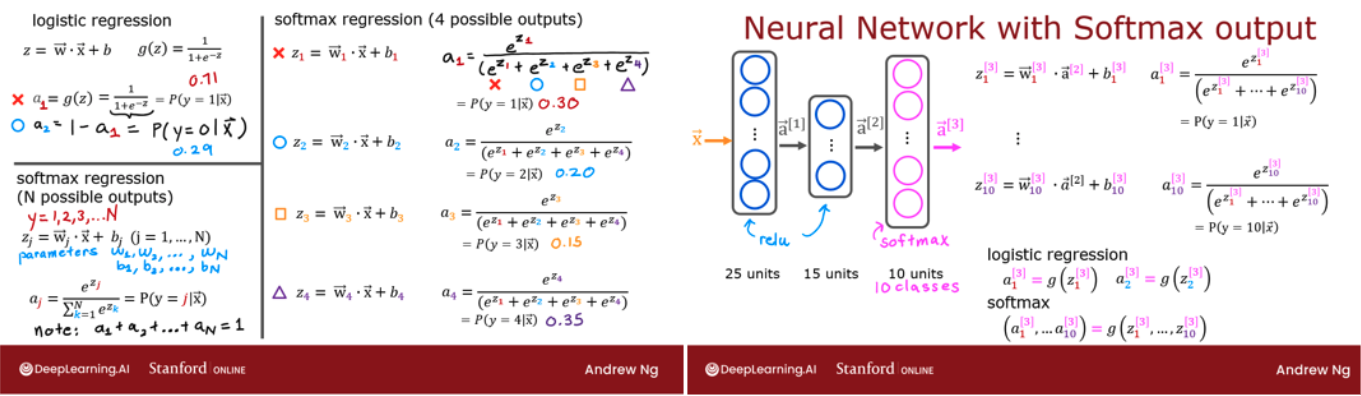

## Softmax Function

In this lab, we will explore the softmax function. This function is used in both Softmax Regression and in Neural Networks when solving Multiclass Classification problems.

In both softmax regression and neural networks with Softmax outputs, N outputs are generated and one output is selected as the predicted category. In both cases a vector $\mathbf{z}$ is generated by a linear function which is applied to a softmax function. The softmax function converts $\mathbf{z}$  into a probability distribution as described below. After applying softmax, each output will be between 0 and 1 and the outputs will add to 1, so that they can be interpreted as probabilities. The larger inputs  will correspond to larger output probabilities.
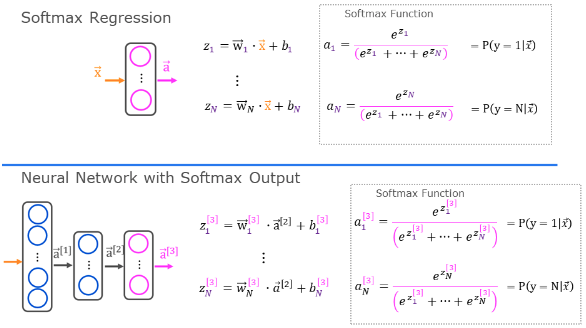

The softmax function can be written:
$$a_j = \frac{e^{z_j}}{ \sum_{k=1}^{N}{e^{z_k} }} \tag{1}$$
The output $\mathbf{a}$ is a vector of length N, so for softmax regression, you could also write:
\begin{align}
\mathbf{a}(x) =
\begin{bmatrix}
P(y = 1 | \mathbf{x}; \mathbf{w},b) \\
\vdots \\
P(y = N | \mathbf{x}; \mathbf{w},b)
\end{bmatrix}
=
\frac{1}{ \sum_{k=1}^{N}{e^{z_k} }}
\begin{bmatrix}
e^{z_1} \\
\vdots \\
e^{z_{N}} \\
\end{bmatrix} \tag{2}
\end{align}
Which shows the output is a vector of probabilities. The first entry is the probability the input is the first category given the input $\mathbf{x}$ and parameters $\mathbf{w}$ and $\mathbf{b}$.  

In [2]:
# NumPy Implementation

def softmax(z):
    ez = np.exp(z) # Element-Wise Exponential
    sm = ez/np.sum(ez)
    return sm

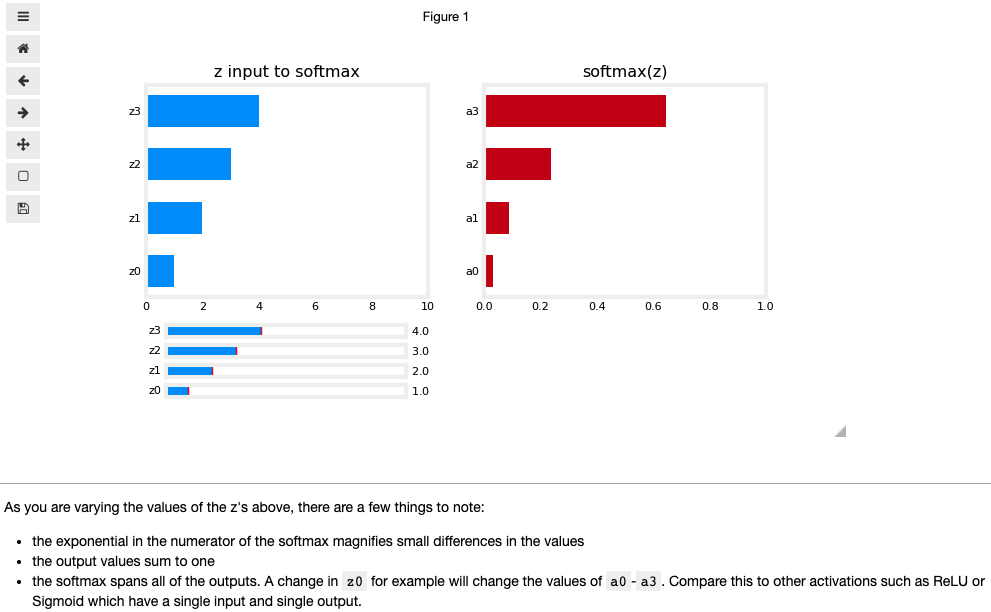

## Cost (Cross-Entropy Loss)

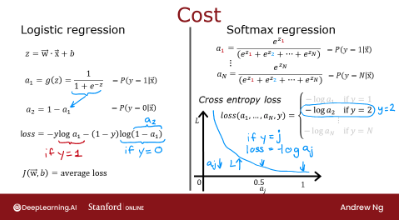

The loss function associated with Softmax, the Cross-Entropy Loss, is:
\begin{equation}
  L(\mathbf{a},y)=\begin{cases}
    -log(a_1), & \text{if $y=1$}.\\
        &\vdots\\
     -log(a_N), & \text{if $y=N$}
  \end{cases} \tag{3}
\end{equation}

Where y is the target category for this example and $\mathbf{a}$ is the output of a softmax function. In particular, the values in $\mathbf{a}$ are probabilities that sum to one.
>**Recall:** In this course, Loss is for one example while Cost covers all examples. 
 
 
Note in (3) above, only the line that corresponds to the target contributes to the loss, other lines are zero. To write the cost equation we need an 'indicator function' that will be 1 when the index matches the target and zero otherwise. 
    $$\mathbf{1}\{y == n\} = =\begin{cases}
    1, & \text{if $y==n$}.\\
    0, & \text{otherwise}.
  \end{cases}$$
Now the cost is:
\begin{align}
J(\mathbf{w},b) = -\frac{1}{m} \left[ \sum_{i=1}^{m} \sum_{j=1}^{N}  1\left\{y^{(i)} == j\right\} \log \frac{e^{z^{(i)}_j}}{\sum_{k=1}^N e^{z^{(i)}_k} }\right] \tag{4}
\end{align}

Where $m$ is the number of examples, $N$ is the number of outputs. This is the average of all the losses.


## TensorFlow
This lab will discuss two ways of implementing the softmax, cross-entropy loss in Tensorflow, the 'obvious' method and the 'preferred' method. The former is the most straightforward while the latter is more numerically stable.

Let's start by creating a dataset to train a multiclass classification model.

In [3]:
# Example DataSet
centers = [[-5, 2], [-2, -2], [1, 2], [5, -2]]
X_train, y_train = make_blobs(n_samples=2000, centers=centers, cluster_std=1.0,random_state=30)

In [ ]:
print(f"Unique Classes: {np.unique(y_train)}")
print(X_train.shape)
print(y_train.shape)

## The Obvious Method

The model below is implemented with the softmax as an activation in the final dense layer.
The loss function is separately specified in the `compile` directive. 

The loss function is `SparseCategoricalCrossentropy`. This loss is described in (3) above. In this model, the softmax takes place in the last layer. The loss function takes in the softmax output which is a vector of probabilities.

In [4]:
model = Sequential(
    [
        Dense(25, activation = "relu"),
        Dense(15, activation = "relu"),
        Dense(4, activation = "softmax") # Softmax Activation Here
    ]
)

model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
)

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


2023-06-05 17:35:45.439080: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


63/63 [==============================] - 1s 1ms/step - loss: 1.2006
Epoch 2/10
63/63 [==============================] - 0s 1ms/step - loss: 0.4553
Epoch 3/10
63/63 [==============================] - 0s 1ms/step - loss: 0.1888
Epoch 4/10
63/63 [==============================] - 0s 1ms/step - loss: 0.0986
Epoch 5/10
63/63 [==============================] - 0s 1ms/step - loss: 0.0698
Epoch 6/10
63/63 [==============================] - 0s 995us/step - loss: 0.0565
Epoch 7/10
63/63 [==============================] - 0s 1ms/step - loss: 0.0489
Epoch 8/10
63/63 [==============================] - 0s 1ms/step - loss: 0.0433
Epoch 9/10
63/63 [==============================] - 0s 1ms/step - loss: 0.0392
Epoch 10/10
63/63 [==============================] - 0s 1ms/step - loss: 0.0357


Because the softmax is integrated into the output layer, the output is a vector of probabilities.

In [5]:
p_nonpreferred = model.predict(X_train)
print(f"Shape p_nonpreferred:{p_nonpreferred.shape}")
print(p_nonpreferred [:2])
print("Largest Value", np.max(p_nonpreferred), "Smallest Value", np.min(p_nonpreferred))

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
63/63 [==============================] - 0s 799us/step
Shape p_nonpreferred:(2000, 4)
[[1.06868637e-03 8.66657775e-03 9.75323021e-01 1.49416225e-02]
 [9.96839166e-01 2.86539993e-03 1.48900028e-04 1.46548904e-04]]
Largest Value 0.9999982 Smallest Value 2.3026314e-09


## The Preferred Method

Recall from lecture, more stable and accurate results can be obtained if the softmax and loss are combined during training.   This is enabled by the 'preferred' organization shown here.
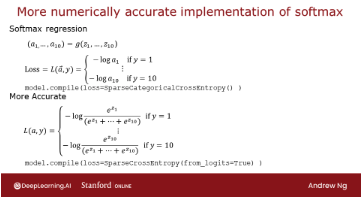
In the preferred organization the final layer has a linear activation. For historical reasons, the outputs in this form are referred to as *logits*. The loss function has an additional argument: `from_logits = True`. This informs the loss function that the softmax operation should be included in the loss calculation. This allows for an optimized implementation.

In [6]:
preferred_model = Sequential(
    [ 
        Dense(25, activation = 'relu'),
        Dense(15, activation = 'relu'),
        Dense(4, activation = 'linear') # <-- Note
    ]
)
preferred_model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), # <-- Note
    optimizer=tf.keras.optimizers.Adam(0.001),
)

preferred_model.fit(X_train, y_train, epochs=10)

Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
63/63 [==============================] - 1s 1ms/step - loss: 1.0550
Epoch 2/10
63/63 [==============================] - 0s 1ms/step - loss: 0.4356
Epoch 3/10
63/63 [==============================] - 0s 1ms/step - loss: 0.1881
Epoch 4/10
63/63 [==============================] - 0s 1ms/step - loss: 0.1045
Epoch 5/10
63/63 [==============================] - 0s 1ms/ste

#### Output Handling

Notice that in the preferred model, the outputs are not probabilities, but can range from large negative numbers to large positive numbers. The output must be sent through a softmax when performing a prediction that expects a probability. 
Let's look at the preferred model outputs:

In [7]:
p_preferred = preferred_model.predict(X_train)
print(f"Shape p_preferred:{p_preferred.shape}")
print(f"Two Example Output Vectors:\n {p_preferred[:2]}")
print("Largest Value", np.max(p_preferred), "Smallest Value", np.min(p_preferred))

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
63/63 [==============================] - 0s 892us/step
Shape p_preferred:(2000, 4)
Two Example Output Vectors:
 [[-1.4233749 -0.888496   3.6918511 -1.213017 ]
 [ 2.935711  -2.1118264 -5.84909   -5.679644 ]]
Largest Value 16.679329 Smallest Value -9.641961


The output predictions are not probabilities!
If the desired output are probabilities, the output should be be processed by a [softmax](https://www.tensorflow.org/api_docs/python/tf/nn/softmax).

In [8]:
sm_preferred = tf.nn.softmax(p_preferred).numpy()
print(f"Two Example Output Vectors:\n {sm_preferred[:2]}")
print("Largest Value", np.max(sm_preferred), "Smallest Value", np.min(sm_preferred))

Two Example Output Vectors:
 [[5.8658002e-03 1.0014335e-02 9.7688079e-01 7.2390973e-03]
 [9.9328583e-01 6.3819978e-03 1.5201395e-04 1.8008325e-04]]
Largest Value 0.99999833 Smallest Value 9.121861e-08


To select the most likely category, the softmax is not required. One can find the index of the largest output using [np.argmax()](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html).

In [9]:
for i in range(5):
    print( f"{p_preferred[i]}, Category: {np.argmax(p_preferred[i])}")

[-1.4233749 -0.888496   3.6918511 -1.213017 ], Category: 2
[ 2.935711  -2.1118264 -5.84909   -5.679644 ], Category: 0
[ 1.8263214 -1.2923254 -4.4587097 -4.7310767], Category: 0
[-2.85017    3.7476556 -1.9705687 -2.727004 ], Category: 1
[-1.3969965 -2.8250563  4.0614233 -5.1028337], Category: 2


## SparseCategorialCrossentropy or CategoricalCrossEntropy

TensorFlow has two potential formats for target values and the selection of the loss defines which is expected.
- SparseCategorialCrossentropy: expects the target to be an integer corresponding to the index. For example, if there are 10 potential target values, y would be between 0 and 9. 
- CategoricalCrossEntropy: Expects the target value of an example to be one-hot encoded where the value at the target index is 1 while the other N-1 entries are zero. An example with 10 potential target values, where the target is 2 would be [0,0,1,0,0,0,0,0,0,0].